Importo librerias y conecto a la base

In [6]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/base_train.csv')
test_og = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/base_val.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/base_val.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

In [8]:
# Obtener la lista de columnas con valores nulos
columnas_nulas = df.columns[df.isnull().all()]

# Eliminar las columnas con valores nulos
df = df.drop(columnas_nulas, axis=1)

columnas_eliminar = ['id', 'host_id', 'host_name']
df = df.drop(columnas_eliminar, axis=1)

In [9]:
#Reemplazo valores numericos nulos por la media de la columna
# Obtener la media de cada columna numérica
mean_bedrooms = df['bedrooms'].mean()
mean_beds = df['beds'].mean()
mean_scores_accuracy = df['review_scores_accuracy'].mean()
mean_scores_cleanliness = df['review_scores_cleanliness'].mean()
mean_scores_checkin = df['review_scores_checkin'].mean()
mean_scores_communication = df['review_scores_communication'].mean()
mean_scores_location = df['review_scores_location'].mean()
mean_scores_value = df['review_scores_value'].mean()

# Reemplazar los valores nulos por la media en cada columna
df['bedrooms'].fillna(mean_bedrooms, inplace=True)
df['beds'].fillna(mean_beds, inplace=True)
df['review_scores_accuracy'].fillna(mean_scores_accuracy, inplace=True)
df['review_scores_cleanliness'].fillna(mean_scores_cleanliness, inplace=True)
df['review_scores_checkin'].fillna(mean_scores_checkin, inplace=True)
df['review_scores_communication'].fillna(mean_scores_communication, inplace=True)
df['review_scores_location'].fillna(mean_scores_location, inplace=True)
df['review_scores_value'].fillna(mean_scores_value, inplace=True)

In [10]:
#Variables no numericas
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
non_numeric_variables = list(non_numeric_columns)
print(non_numeric_variables)

['source', 'name', 'description', 'neighborhood_overview', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable']


In [11]:
#elimino license
df = df.drop('license', axis=1)

In [12]:
boolean_variables = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']

# Definir función para reemplazar los valores booleanos
def map_boolean_values(value):
    if value == 't':
        return 1
    elif value == 'f':
        return 0
    else:
        return value

# Iterar sobre las variables booleanas y aplicar la función de mapeo
for variable in boolean_variables:
    df[variable] = df[variable].map(map_boolean_values)

df['host_is_superhost'].fillna(1, inplace=True)

# Imprimir el dataframe actualizado


In [13]:
#Variables no numericas
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
non_numeric_variables = list(non_numeric_columns)
print(non_numeric_variables)

#city scrape trato como booleano
df['source'] = df['source'].map({'city scrape': 0, 'previous scrape': 1})

['source', 'name', 'description', 'neighborhood_overview', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'calendar_last_scraped', 'first_review', 'last_review']


In [14]:
#Para fechas

date_columns = ['host_since', 'calendar_last_scraped', 'first_review', 'last_review']

# Obtener el valor mínimo de todas las fechas presentes en las columnas
min_date = pd.to_datetime(df[date_columns].min()).min()

# Recorrer las columnas y transformar las fechas en valores numéricos
for column in date_columns:
    df[column] = (pd.to_datetime(df[column]) - min_date).dt.days + 1

# Verificar el resultado
print(df[date_columns])


      host_since  calendar_last_scraped  first_review  last_review
0           1356                   5186          2935         5179
1              1                   5186           188         5157
2            435                   5186           525         4216
3            546                   5186          1203         5178
4            597                   5186           698         5171
...          ...                    ...           ...          ...
4923        2225                   5186          5032         5137
4924        2679                   5186          4933         5142
4925        4900                   5186          5164         5164
4926        3588                   5186          4953         5028
4927        2242                   5186          4965         5073

[4928 rows x 4 columns]


In [15]:
#Variables no numericas
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
non_numeric_variables = list(non_numeric_columns)
print(non_numeric_variables)

['name', 'description', 'neighborhood_overview', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price']


In [16]:
#price a numero
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [17]:
#cuento palabras de variables
import re

text_columns = ['name', 'description', 'neighborhood_overview', 'host_about', 'amenities', 'host_verifications']

for column in text_columns:
    df[column] = df[column].apply(lambda x: len(re.findall(r'\b\w+\b', x.lower())) if isinstance(x, str) else 0)

In [18]:
#varaibles categoricas
categorical_columns = ['room_type', 'property_type', 'neighbourhood_cleansed', 'host_neighbourhood', 'host_location', 'host_response_time', 'neighbourhood']

for column in categorical_columns:
    df[column] = pd.factorize(df[column])[0]

In [ ]:
#Porcentajes y baños
import re
import numpy as np

columns_to_transform = ['host_response_rate', 'host_acceptance_rate', 'bathrooms_text']

for column in columns_to_transform:
    df[column] = df[column].astype(str).str.replace(r'[^0-9.]', '')
    df[column] = df[column].replace('', np.nan).astype(float)
    df[column] = df[column].fillna(0)
df.info()

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

# Separar características (X) y variable objetivo (y)
X = df.drop('review_scores_rating', axis=1)
y = df['review_scores_rating']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Definir los modelos y los respectivos rangos de hiperparámetros
models = {
    'XGBRegressor': (XGBRegressor(), {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}),
    'LinearRegression': (LinearRegression(), {'fit_intercept': [True, False]}),
    'ExtraTreesRegressor': (ExtraTreesRegressor(), {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [100, 200, 300, 400], 'max_depth': [3, 5, 7,9]}),
    'CatBoostRegressor': (CatBoostRegressor(), {'iterations': [100, 200, 300], 'depth': [3, 5, 7]}),
    'LGBMRegressor': (LGBMRegressor(), {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 3]}),
    'AdaBoostRegressor': (AdaBoostRegressor(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.5, 1.0]}),
    'SVR': (SVR(), {'C': [1.0, 2.0, 3.0], 'epsilon': [0.1, 0.2, 0.3]})
}

results = {}
for model_name, (model, param_grid) in models.items():
    random_search = RandomizedSearchCV(model, param_grid, scoring='r2', cv=5, n_iter=10, random_state=2)
    random_search.fit(X_train, y_train)
    y_pred = random_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'R2': r2, 'Best Parameters': random_search.best_params_}

# Mostrar los resultados
for model_name, result in results.items():
    print(model_name)
    print('R2:', result['R2'])
    print('Best Parameters:', result['Best Parameters'])
    print()

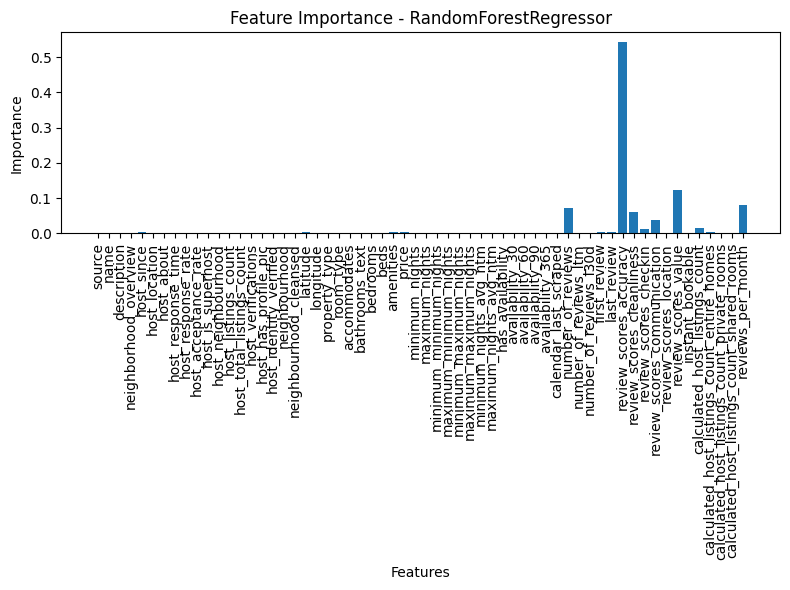

RandomForestRegressor
R2: 0.8088950442157852
Best Parameters: {'n_estimators': 200, 'max_depth': 7}



In [23]:
#feature analysis para random forest regressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Separar características (X) y variable objetivo (y)
X = df.drop('review_scores_rating', axis=1)
y = df['review_scores_rating']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Definir los modelos y los respectivos rangos de hiperparámetros
models = {
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [100, 200, 300, 400], 'max_depth': [3, 5, 7,9]}),
}

results = {}
for model_name, (model, param_grid) in models.items():
    if model_name != 'LinearRegression':
        random_search = RandomizedSearchCV(model, param_grid, scoring='r2', cv=5, n_iter=10, random_state=2)
        random_search.fit(X_train, y_train)
        y_pred = random_search.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        feature_importance = random_search.best_estimator_.feature_importances_

        # Gráfico de feature importance
        plt.figure(figsize=(8, 6))
        plt.bar(X.columns, feature_importance)
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.title(f'Feature Importance - {model_name}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        results[model_name] = {'R2': r2, 'Best Parameters': random_search.best_params_}

# Mostrar los resultados
for model_name, result in results.items():
    print(model_name)
    print('R2:', result['R2'])
    print('Best Parameters:', result['Best Parameters'])
    print()

In [24]:
#Edicion de variables para correr de nuevo RFR

# Lista de columnas deseadas
columns = ['number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness',
           'review_scores_checkin', 'review_scores_communication', 'review_scores_value',
           'calculated_host_listings_count', 'reviews_per_month']

# Crear el nuevo DataFrame con las columnas seleccionadas
df_RFR = df.loc[:, columns]

In [ ]:
#Corremos Random forest regressor solo con las variables pertinentes, y usamos gridsearch para determinar los mejores hiperparametros a utilizar
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Separar características (X) y variable objetivo (y)
X = df_RFR
y = df['review_scores_rating']

# Definir los hiperparámetros a probar en GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [0, 3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3]
}

# Crear el modelo Random Forest Regressor
model = RandomForestRegressor()

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
grid_search.fit(X, y)

# Obtener los resultados del GridSearchCV
best_r2 = grid_search.best_score_
best_params = grid_search.best_params_

# Imprimir el mejor resultado de R2 y los mejores hiperparámetros
print("Mejor R2 obtenido:", best_r2)
print("Mejores hiperparámetros:", best_params)


Modelo con GridSearchCV (no usado)

In [ ]:
'''import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Reemplazar los valores NaN por 0
df.fillna(0, inplace=True)

# Separar características (X) y variable objetivo (y)
X = df.drop('review_scores_rating', axis=1)
y = df['review_scores_rating']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos a utilizar con sus respectivos hiperparámetros
models = {
    'XGBRegressor': (XGBRegressor(), {
        'objective': ['reg:squarederror'],
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.01, 0.001]
    }),
    'LinearRegression': (LinearRegression(), {
        'fit_intercept': [True, False]
    }),
    'ExtraTreesRegressor': (ExtraTreesRegressor(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }),
    'RandomForestRegressor': (RandomForestRegressor(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }),
    'CatBoostRegressor': (CatBoostRegressor(), {
        'iterations': [100, 200, 300],
        'learning_rate': [0.1, 0.01, 0.001]
    }),
    'LGBMRegressor': (LGBMRegressor(), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [-1, 5, 10]
    }),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }),
    'AdaBoostRegressor': (AdaBoostRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001]
    }),
    'SVR': (SVR(), {
        'C': [1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly']
    })
}

# Realizar la búsqueda de hiperparámetros para cada modelo
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {
        'R2': r2,
        'Best params': grid_search.best_params_
    }

# Imprimir los resultados
for model_name, result in results.items():
    print(model_name)
    print(f"R2: {result['R2']}")
    print(f"Hiperparámetros utilizados: {result['Best params']}")
    print()
'''

Preparamos la tabla Test

In [138]:
# Obtener la lista de columnas con valores nulos
columnas_nulas = test.columns[test.isnull().all()]

# Eliminar las columnas con valores nulos
test = test.drop(columnas_nulas, axis=1)

columnas_eliminar = ['id', 'host_id', 'host_name']
test = test.drop(columnas_eliminar, axis=1)

In [139]:
#Reemplazo valores numericos nulos por la media de la columna
# Obtener la media de cada columna numérica
mean_bedrooms = test['bedrooms'].mean()
mean_beds = test['beds'].mean()
mean_scores_accuracy = test['review_scores_accuracy'].mean()
mean_scores_cleanliness = test['review_scores_cleanliness'].mean()
mean_scores_checkin = test['review_scores_checkin'].mean()
mean_scores_communication = test['review_scores_communication'].mean()
mean_scores_location = test['review_scores_location'].mean()
mean_scores_value = test['review_scores_value'].mean()

# Reemplazar los valores nulos por la media en cada columna
test['bedrooms'].fillna(mean_bedrooms, inplace=True)
test['beds'].fillna(mean_beds, inplace=True)
test['review_scores_accuracy'].fillna(mean_scores_accuracy, inplace=True)
test['review_scores_cleanliness'].fillna(mean_scores_cleanliness, inplace=True)
test['review_scores_checkin'].fillna(mean_scores_checkin, inplace=True)
test['review_scores_communication'].fillna(mean_scores_communication, inplace=True)
test['review_scores_location'].fillna(mean_scores_location, inplace=True)
test['review_scores_value'].fillna(mean_scores_value, inplace=True)

In [140]:
#Variables no numericas
non_numeric_columns = test.select_dtypes(exclude=['float64', 'int64']).columns
non_numeric_variables = list(non_numeric_columns)
print(non_numeric_variables)

['source', 'name', 'description', 'neighborhood_overview', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable']


In [141]:
#elimino license
test = test.drop('license', axis=1)

In [142]:
boolean_variables = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']

# Definir función para reemplazar los valores booleanos
def map_boolean_values(value):
    if value == 't':
        return 1
    elif value == 'f':
        return 0
    else:
        return value

# Iterar sobre las variables booleanas y aplicar la función de mapeo
for variable in boolean_variables:
    test[variable] = test[variable].map(map_boolean_values)

test['host_is_superhost'].fillna(1, inplace=True)

In [143]:
#Variables no numericas
non_numeric_columns = test.select_dtypes(exclude=['float64', 'int64']).columns
non_numeric_variables = list(non_numeric_columns)
print(non_numeric_variables)

#city scrape trato como booleano
test['source'] = test['source'].map({'city scrape': 0, 'previous scrape': 1})

['source', 'name', 'description', 'neighborhood_overview', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'calendar_last_scraped', 'first_review', 'last_review']


In [ ]:
#Para fechas

date_columns = ['host_since', 'calendar_last_scraped', 'first_review', 'last_review']

# Obtener el valor mínimo de todas las fechas presentes en las columnas
min_date = pd.to_datetime(test[date_columns].min()).min()

# Recorrer las columnas y transformar las fechas en valores numéricos
for column in date_columns:
    test[column] = (pd.to_datetime(test[column]) - min_date).dt.days + 1

# Verificar el resultado
print(test[date_columns])


In [145]:
#Variables no numericas
non_numeric_columns = test.select_dtypes(exclude=['float64', 'int64']).columns
non_numeric_variables = list(non_numeric_columns)
print(non_numeric_variables)

['name', 'description', 'neighborhood_overview', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price']


In [146]:
#price a numero
test['price'] = test['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [147]:
#cuento palabras de variables
import re

text_columns = ['name', 'description', 'neighborhood_overview', 'host_about', 'amenities', 'host_verifications']

for column in text_columns:
    test[column] = test[column].apply(lambda x: len(re.findall(r'\b\w+\b', x.lower())) if isinstance(x, str) else 0)

In [148]:
#varaibles categoricas
categorical_columns = ['room_type', 'property_type', 'neighbourhood_cleansed', 'host_neighbourhood', 'host_location', 'host_response_time', 'neighbourhood']

for column in categorical_columns:
    test[column] = pd.factorize(test[column])[0]

In [ ]:
#Porcentajes y baños
import re
import numpy as np

columns_to_transform = ['host_response_rate', 'host_acceptance_rate', 'bathrooms_text']

for column in columns_to_transform:
    test[column] = test[column].astype(str).str.replace(r'[^0-9.]', '')
    test[column] = test[column].replace('', np.nan).astype(float)
    test[column] = test[column].fillna(0)
test.info()

In [150]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from google.colab import files

# Entrenar el modelo con los mejores hiperparámetros
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                              max_depth=None, max_features=1.0, max_leaf_nodes=None,
                              max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,
                              min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
                              n_jobs=None, oob_score=False, random_state=None, verbose=0,
                              warm_start=False)
model.fit(X, y)

review_scores_rating = model.predict(test)

# Crear el archivo csv con las columnas 'id' y 'review_scores_rating'
predicciones_finales = pd.DataFrame({'id': test_og['id'], 'review_scores_rating': review_scores_rating})

# Contar registros nulos
registros_nulos = predicciones_finales['review_scores_rating'].isnull().sum()
print("Cantidad de registros nulos: ", registros_nulos)

# Filtrar los review_scores_rating que están fuera del rango de 0 a 5
valores_fuera_de_rango = predicciones_finales[(predicciones_finales['review_scores_rating'] < 0) | (predicciones_finales['review_scores_rating'] > 5)]
print("Cantidad de valores fuera de rango: ", len(valores_fuera_de_rango))

# Guardar el DataFrame resultante en un archivo CSV
predicciones_finales.to_csv('predicciones_finales.csv', index=False)

# Descargar el archivo CSV
files.download('predicciones_finales.csv')



Cantidad de registros nulos:  0
Cantidad de valores fuera de rango:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>